In [22]:
#Dependencies and setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sts
import time
import json
import requests

#Import API key 
from config import apikey as weather_api_key

#Import citipy to determine city based on latitude and longitude
from citipy import citipy

#Prep csv filepath and file for program output
output_data_file = "output_data/cities.csv"

#Establish the range for latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)


weather_api_key

'89d9da8fa5efd4fd3eff255699a26c79'

In [23]:
#Generate the list of cities for evaluation

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [24]:
# Establishing the structures for the API Call 

api_cities = []
country = []
date = []
max_temp = []
humidity = []
clouds = []
windspeed = []
api_lat = []
api_lon = []

url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Beginning Data Retrieval")
print("-------------------------------------")

#API call with extractions required for analysis per city in the list of cities previously generated
for cityname in cities: 
    
    try:
        query_url = (url + cityname + "&units=imperial" + "&appid=" + weather_api_key)
        json_weather = requests.get(query_url).json()
        
        api_cities.append(json_weather["name"])
        country.append(json_weather["sys"]["country"])
        date.append(json_weather["dt"])
        max_temp.append(json_weather["main"]["temp_max"])
        humidity.append(json_weather["main"]["humidity"])
        clouds.append(json_weather["clouds"]["all"])
        windspeed.append(json_weather["wind"]["speed"])
        api_lat.append(json_weather["coord"]["lat"])
        api_lon.append(json_weather["coord"]["lon"])
        
        print(f"Processing Record {cities.index(cityname)} | {cityname}")
        
    except: 
        print(f"Record request {cities.index(cityname)} could not be found in OpenWeather Database.")
        print(f"Loading next record...")
        pass

print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")


Beginning Data Retrieval
-------------------------------------
Record request 0 could not be found in OpenWeather Database.
Loading next record...
Processing Record 1 | saint-georges
Processing Record 2 | fengzhen
Processing Record 3 | pathein
Processing Record 4 | mataura
Processing Record 5 | butaritari
Processing Record 6 | caravelas
Processing Record 7 | bredasdorp
Record request 8 could not be found in OpenWeather Database.
Loading next record...
Processing Record 9 | tessalit
Processing Record 10 | chokurdakh
Processing Record 11 | darlowo
Processing Record 12 | esperance
Processing Record 13 | vaini
Processing Record 14 | hithadhoo
Processing Record 15 | bela vista
Processing Record 16 | port blair
Processing Record 17 | colac
Processing Record 18 | haradok
Processing Record 19 | podporozhye
Processing Record 20 | shache
Processing Record 21 | iskitim
Processing Record 22 | punta arenas
Processing Record 23 | kapaa
Processing Record 24 | camopi
Processing Record 25 | lorengau
Pr

Processing Record 214 | ribeira grande
Processing Record 215 | cayenne
Processing Record 216 | san cristobal
Processing Record 217 | kaitangata
Record request 218 could not be found in OpenWeather Database.
Loading next record...
Processing Record 219 | khuzdar
Processing Record 220 | sorland
Processing Record 221 | san roque
Processing Record 222 | ransang
Processing Record 223 | vao
Processing Record 224 | sisimiut
Processing Record 225 | te anau
Processing Record 226 | tukrah
Processing Record 227 | stege
Processing Record 228 | tra vinh
Processing Record 229 | berlevag
Processing Record 230 | do gonbadan
Processing Record 231 | markova
Processing Record 232 | nosivka
Processing Record 233 | salym
Processing Record 234 | ryomgard
Processing Record 235 | machico
Record request 236 could not be found in OpenWeather Database.
Loading next record...
Processing Record 237 | schladming
Processing Record 238 | moranbah
Processing Record 239 | alofi
Processing Record 240 | zaragoza
Processi

Processing Record 424 | naryan-mar
Processing Record 425 | whitehorse
Processing Record 426 | nosy varika
Processing Record 427 | patnagarh
Processing Record 428 | kupang
Processing Record 429 | yibin
Processing Record 430 | ocampo
Processing Record 431 | nishihara
Processing Record 432 | necochea
Record request 433 could not be found in OpenWeather Database.
Loading next record...
Processing Record 434 | cururupu
Processing Record 435 | kvarkeno
Processing Record 436 | baijiantan
Processing Record 437 | hami
Processing Record 438 | savannah bight
Processing Record 439 | petropavlovsk-kamchatskiy
Processing Record 440 | quatre cocos
Processing Record 441 | rawson
Processing Record 442 | dukat
Processing Record 443 | akureyri
Processing Record 444 | zaozerne
Processing Record 445 | hirara
Processing Record 446 | freeport
Processing Record 447 | walvis bay
Processing Record 448 | mookane
Processing Record 449 | shubarkuduk
Processing Record 450 | itoman
Processing Record 451 | borovoy
Pr

In [25]:
#Converting raw API data into a dataframe 

weather_dict = {
    
    "City": api_cities, 
    "Latitude": api_lat, 
    "Longitude": api_lon, 
    "Maxium Temperature (F)": max_temp, 
    "Humidity (%)": humidity, 
    "Cloudiness (%)": clouds, 
    "Wind Speed (mph)": windspeed,
    "Country": country, 
    "Date": date
    
}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Maxium Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,St. George's,12.0564,-61.7485,82.40,69,20,19.57,GD,1619475978
1,Fengzhen,40.4394,113.1536,39.20,24,8,8.10,CN,1619475987
2,Pathein,16.7833,94.7333,78.08,81,63,4.81,MM,1619475974
3,Mataura,-46.1927,168.8643,44.01,85,98,3.00,NZ,1619475987
4,Butaritari,3.0707,172.7902,83.32,75,90,12.93,KI,1619475988
...,...,...,...,...,...,...,...,...,...
570,Illapel,-31.6308,-71.1653,69.75,56,0,4.65,CL,1619475971
571,Hofn,64.2539,-15.2082,38.91,73,16,4.16,IS,1619476174
572,Baruun-Urt,46.6806,113.2792,31.37,51,20,18.75,MN,1619476174
573,Petrolina de Goiás,-16.0950,-49.3381,80.60,73,40,1.99,BR,1619476175


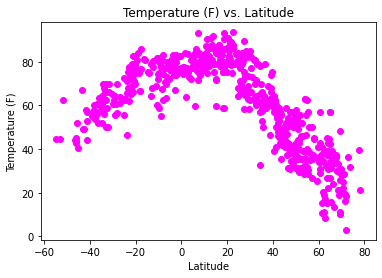

This plot analyzes shifts in temperature (F) as the degrees of latitude changes from -90 to 90 degrees. Temperature appears to increase as you approach 0 degrees of latitude


In [26]:
# Analysis of Temperature (F) vs. Latitude

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(weather_df["Latitude"], weather_df["Maxium Temperature (F)"], marker="o", color="magenta")
plt.savefig("output_data/TemperaturevLatitude.png")
plt.show()
print("This plot analyzes shifts in temperature (F) as the degrees of",
      "latitude changes from -90 to 90 degrees. Temperature appears to", 
      "increase as you approach",
      "0 degrees of latitude")



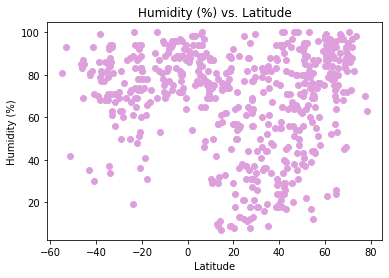

This plot analyzes shifts in humidity (%) as the degrees of latitude changes from -90 to 90 degrees. There does not appear to be a clear correlation between the two metrics.


In [27]:
#Analysis of Humidity (%) vs. Latitude

plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], marker="o", color="plum")
plt.savefig("output_data/HumidityvLatitude.png")
plt.show()
print("This plot analyzes shifts in humidity (%) as the degrees of",
      "latitude changes from -90 to 90 degrees.",
      "There does not appear to be a clear correlation between the two metrics.")

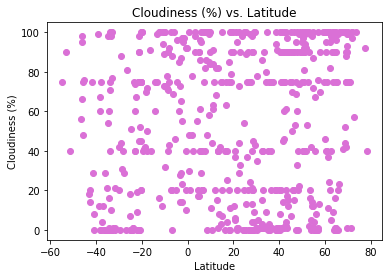

This plot analyzes shifts in cloudiness (%) as the degrees of latitude changes from -90 to 90 degrees. There does not appear to be a clear correlation between the two metrics.


In [28]:
#Analysis of Cloudiness (%) vs. Latitude

plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], marker="o", color="orchid")
plt.savefig("output_data/CloudinessvLatitude.png")
plt.show()

print("This plot analyzes shifts in cloudiness (%) as the degrees of",
      "latitude changes from -90 to 90 degrees.",
      "There does not appear to be a clear correlation between the two metrics.")



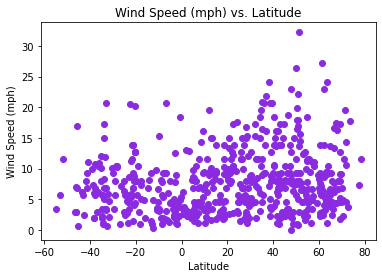

This plot analyzes shifts in wind Speed (mph) as the degrees of latitude changes from -90 to 90 degrees. There does not appear to be a clear correlation between the two metrics.


In [29]:
#Analysis of Wind Speed (mph) vs. Latitude

plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], marker="o", color="blueviolet")
plt.savefig("output_data/WindSpeedvLatitude.png")
plt.show()

print("This plot analyzes shifts in wind Speed (mph) as the degrees of",
      "latitude changes from -90 to 90 degrees.",
      "There does not appear to be a clear correlation between the two metrics.")

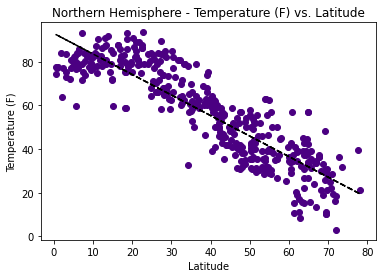

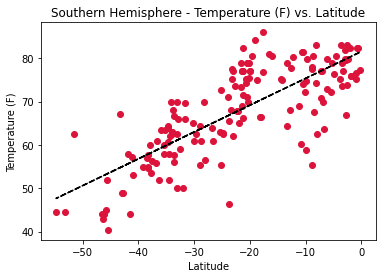

According to the linear regression analysis there is a correlation between increasing temperature and proximity to zero degrees latitude.


In [30]:
#Organizing the raw data in dataframe by hemisphere

bins = [-90, 0, 90]
bin_names = ["Southern Hemisphere", "Northern Hemisphere"]
weather_df["Hemisphere"]  = pd.cut(weather_df["Latitude"], bins, labels=bin_names, include_lowest=True)


nhem_df = weather_df.loc[weather_df["Hemisphere"] == "Northern Hemisphere", :].reset_index(drop=True)
shem_df = weather_df.loc[weather_df["Hemisphere"] == "Southern Hemisphere", :].reset_index(drop=True)

#Analyzing temp v latitude by hemisphere

plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(nhem_df["Latitude"], nhem_df["Maxium Temperature (F)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Maxium Temperature (F)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/NHEMTempvLatitude.png")
plt.show()

plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(shem_df["Latitude"], shem_df["Maxium Temperature (F)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Maxium Temperature (F)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/SHEMTempvLatitude.png")
plt.show()

print("According to the linear regression analysis there is a correlation between increasing temperature and proximity to zero degrees latitude.")

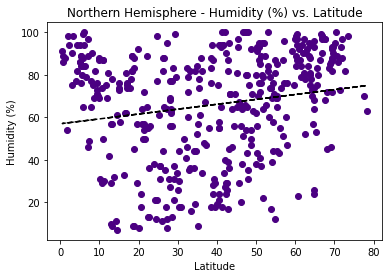

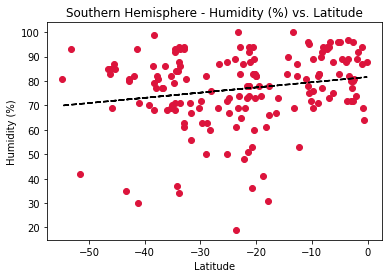

There does not appear to be a correlation between humidity and latitude in either hemisphere.


In [31]:
#Analyzing humidity v latitude by hemisphere)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(nhem_df["Latitude"], nhem_df["Humidity (%)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Humidity (%)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/NHEMHumvLatitude.png")
plt.show()


plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(shem_df["Latitude"], shem_df["Humidity (%)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Humidity (%)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/SHEMHumvLatitude.png")
plt.show()

print("There does not appear to be a correlation between humidity and latitude in either hemisphere.")

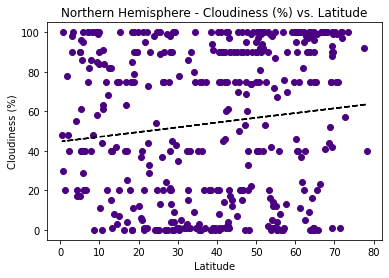

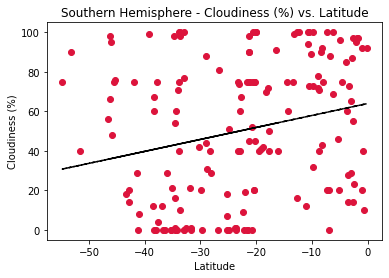

There does not appear to be a correlation between cloudiness and latitude in either hemisphere.


In [32]:
#Analyzing cloudiness v latitude by hemisphere

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(nhem_df["Latitude"], nhem_df["Cloudiness (%)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Cloudiness (%)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/NEHMCloudsvLatitude.png")
plt.show()


plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(shem_df["Latitude"], shem_df["Cloudiness (%)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Cloudiness (%)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/SHEMCloudsvLatitude.png")
plt.show()

print("There does not appear to be a correlation between cloudiness and latitude in either hemisphere.")

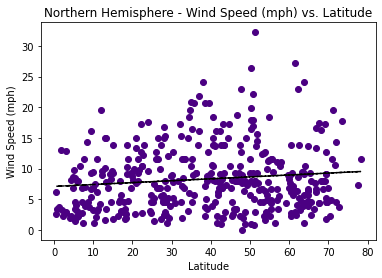

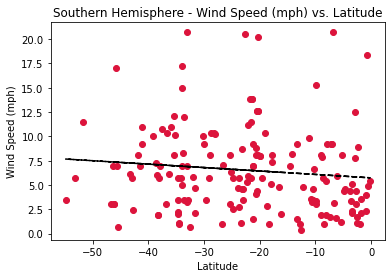

There does not appear to be a correlation between wind speed and latitude in either hemisphere.


In [33]:
#Analyzing wind speed v latitude by hemisphere

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(nhem_df["Latitude"], nhem_df["Wind Speed (mph)"], marker="o", color="indigo")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(nhem_df["Latitude"], nhem_df["Wind Speed (mph)"])
m_fit = m_slope * (nhem_df["Latitude"]) + m_int
plt.plot(nhem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/NHEMWindssvLatitude.png")
plt.show()


plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(shem_df["Latitude"], shem_df["Wind Speed (mph)"], marker="o", color="crimson")
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(shem_df["Latitude"], shem_df["Wind Speed (mph)"])
m_fit = m_slope * (shem_df["Latitude"]) + m_int
plt.plot(shem_df["Latitude"],m_fit,"k--")
plt.savefig("output_data/SHEMWindssvLatitude.png")
plt.show()

print("There does not appear to be a correlation between wind speed and latitude in either hemisphere.")

In [34]:
#Print dataframe to a CSV file 

weather_df.to_csv(output_data_file, index=False, header=True)